In [2]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [3]:
run_id = 'Algorithm1_apple_etc'

In [4]:
os.mkdir(run_id)

In [5]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [201]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [177]:
predict = DataLoader('^GSPC', '2018-02-01', '2018-05-01')
predict = predict.get_adjclose()

In [178]:
predict_req, real = data_prep(predict, 20, 40) # dividing data into predictor input and real data

### Individual predictor forecasts

In [203]:
individual_predictors_forecasts = individual_predictors_pretrained_SP500_40_4(predict_req, 40)

### System disagreement between individual predictor forecasts

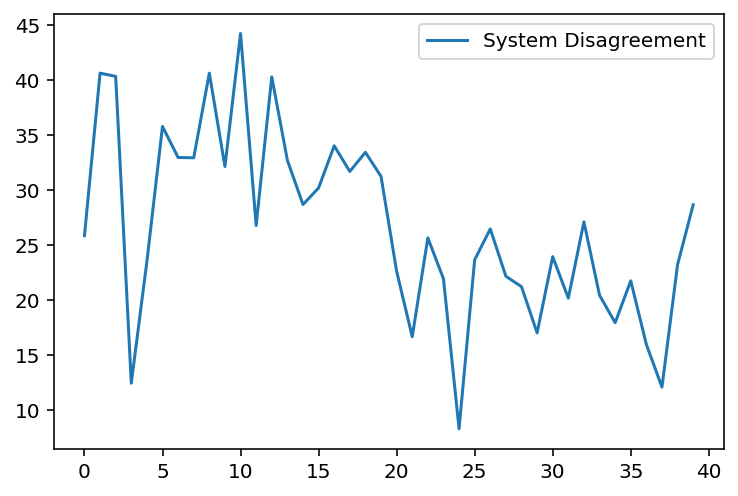

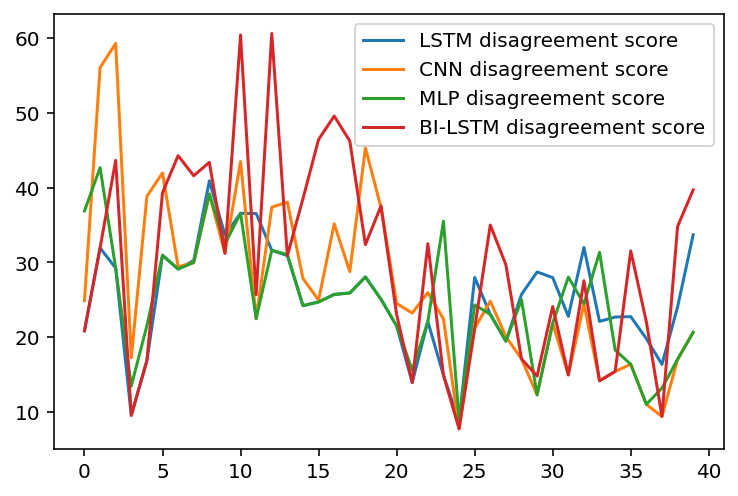

In [204]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [205]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [206]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [207]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Real Value,LSTM,CNN,MLP,BI-LSTM,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score
Date,,,,,,,,,,,,,,,
2018-03-02,2755.539124,2755.539124,2755.539124,2755.539124,2783.257690,2691.250000,2738.724121,2730.656250,2792.392578,2760.383545,25.858551,20.848938,24.882874,36.853455,20.848938
2018-03-05,2739.019531,2734.871599,2736.945565,2682.990234,2734.006688,2720.939941,2731.208496,2682.990234,2781.670654,2760.208740,40.630188,31.920166,56.029297,42.651123,31.920166
2018-03-06,2751.476624,2750.636488,2750.237759,2752.266602,2749.109105,2728.120117,2752.266602,2692.222656,2766.308350,2795.108887,40.337555,29.231995,59.253967,29.231995,43.632263
2018-03-07,2746.247986,2745.788285,2745.608461,2744.381348,2725.282041,2726.800049,2744.381348,2729.013916,2759.718018,2751.878662,12.451202,9.550354,17.234070,13.470032,9.550354
2018-03-08,2748.306580,2743.943021,2746.671877,2709.475586,2750.597501,2738.969971,2753.419189,2709.475586,2769.841064,2760.490479,23.520966,16.859192,38.830994,21.534485,16.859192
2018-03-09,2743.942871,2743.880988,2741.569054,2723.987061,2748.968390,2786.570068,2723.987061,2702.005371,2766.527100,2783.251953,35.784973,30.946655,41.937500,30.946655,39.309082
2018-03-12,2756.105530,2763.656171,2755.283895,2800.364258,2764.840744,2783.020020,2727.294922,2726.711914,2770.051025,2800.364258,32.964142,29.102112,29.393616,29.102112,44.258728
2018-03-13,2756.411011,2762.027129,2756.299910,2774.781250,2761.364654,2765.310059,2726.171875,2726.708496,2774.781250,2797.982422,32.938049,30.239136,29.970825,29.970825,41.571411
2018-03-14,2751.367920,2754.971775,2751.477107,2786.283203,2755.763710,2749.479980,2710.476807,2713.984131,2786.283203,2794.727539,40.631409,40.891113,39.137451,39.137451,43.359619


In [14]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [208]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,System Disagreement
Date,,,,,,,,,,,,,,
2018-03-02,47.474121,39.406250,101.142578,69.133545,64.289124,64.289124,64.289124,64.289124,92.007690,20.848938,24.882874,36.853455,20.848938,25.858551
2018-03-05,10.268555,37.949707,60.730713,39.268799,18.079590,13.931658,16.005624,37.949707,13.066746,31.920166,56.029297,42.651123,31.920166,40.630188
2018-03-06,24.146484,35.897461,38.188232,66.988770,23.356506,22.516371,22.117642,24.146484,20.988988,29.231995,59.253967,29.231995,43.632263,40.337555
2018-03-07,17.581299,2.213867,32.917969,25.078613,19.447937,18.988236,18.808412,17.581299,1.518008,9.550354,17.234070,13.470032,9.550354,12.451202
2018-03-08,14.449219,29.494385,30.871094,21.520508,9.336609,4.973051,7.701906,29.494385,11.627531,16.859192,38.830994,21.534485,16.859192,23.520966
2018-03-09,62.583008,84.564697,20.042969,3.318115,42.627197,42.689081,45.001015,62.583008,37.601678,30.946655,41.937500,30.946655,39.309082,35.784973
2018-03-12,55.725098,56.308105,12.968994,17.344238,26.914490,19.363849,27.736124,17.344238,18.179275,29.102112,29.393616,29.102112,44.258728,32.964142
2018-03-13,39.138184,38.601562,9.471191,32.672363,8.899048,3.282930,9.010148,9.471191,3.945405,30.239136,29.970825,29.970825,41.571411,32.938049
2018-03-14,39.003174,35.495850,36.803223,45.247559,1.887939,5.491794,1.997126,36.803223,6.283730,40.891113,39.137451,39.137451,43.359619,40.631409


In [16]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,System Disagreement
LSTM absolute error,1.000000,0.938143,0.893850,0.871239,0.945079,0.947334,0.946961,0.930212,0.926436,-0.458200,-0.411759,-0.503146,-0.199601,-0.437851
CNN absolute error,0.938143,1.000000,0.851831,0.820643,0.918440,0.923530,0.920802,0.940430,0.903716,-0.390117,-0.510245,-0.575052,-0.266890,-0.502092
MLP absolute error,0.893850,0.851831,1.000000,0.910404,0.966244,0.967156,0.964705,0.892385,0.949946,-0.456353,-0.465693,-0.458970,-0.359626,-0.510324
BI-LSTM absolute error,0.871239,0.820643,0.910404,1.000000,0.943656,0.941868,0.941198,0.862894,0.936931,-0.295429,-0.351807,-0.492940,-0.020471,-0.308639
Average absolute error,0.945079,0.918440,0.966244,0.943656,1.000000,0.999150,0.999915,0.922505,0.980315,-0.457755,-0.496563,-0.565058,-0.255490,-0.504482
NoMemory absolute error,0.947334,0.923530,0.967156,0.941868,0.999150,1.000000,0.999209,0.930748,0.980305,-0.457282,-0.501781,-0.565810,-0.263281,-0.509520
Memory absolute error,0.946961,0.920802,0.964705,0.941198,0.999915,0.999209,1.000000,0.924143,0.980532,-0.457657,-0.499894,-0.565567,-0.256017,-0.505967
Focus absolute error,0.930212,0.940430,0.892385,0.862894,0.922505,0.930748,0.924143,1.000000,0.925501,-0.422169,-0.448904,-0.511422,-0.243318,-0.462885
Anchor absolute error,0.926436,0.903716,0.949946,0.936931,0.980315,0.980305,0.980532,0.925501,1.000000,-0.416754,-0.463994,-0.487798,-0.194304,-0.441988
LSTM disagreement score,-0.458200,-0.390117,-0.456353,-0.295429,-0.457755,-0.457282,-0.457657,-0.422169,-0.416754,1.000000,0.516970,0.577658,0.646000,0.784028


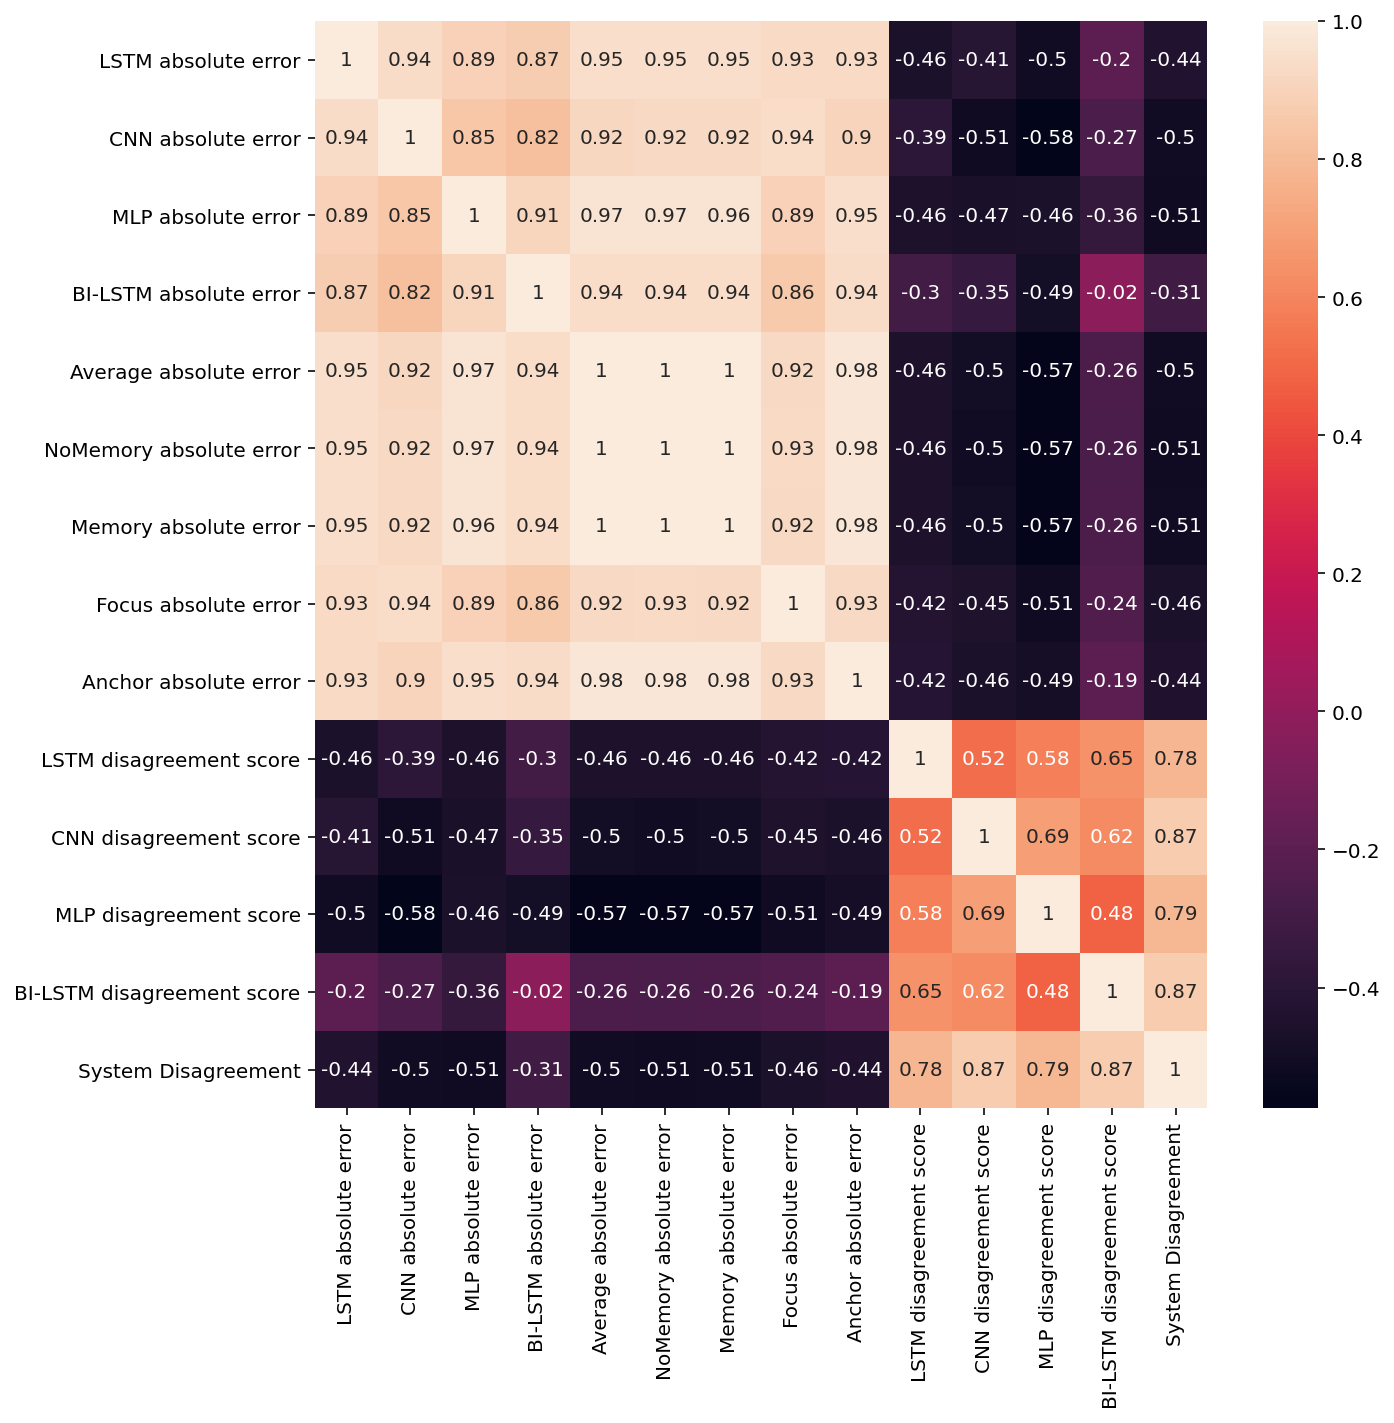

In [209]:
correlation_ = correlation(prediction_error, True)
correlation_

In [20]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MAE, MSE and MSE log scores

,Algorithms,MSE
0,Average,11093.847220
1,NoMemory,10835.506978
2,Memory,10931.367953
3,Focus,7704.736822
4,Anchor,7690.470318
5,LSTM,8250.314539
6,CNN,8790.858655
7,MLP,13735.230145
8,BI-LSTM,16327.625332


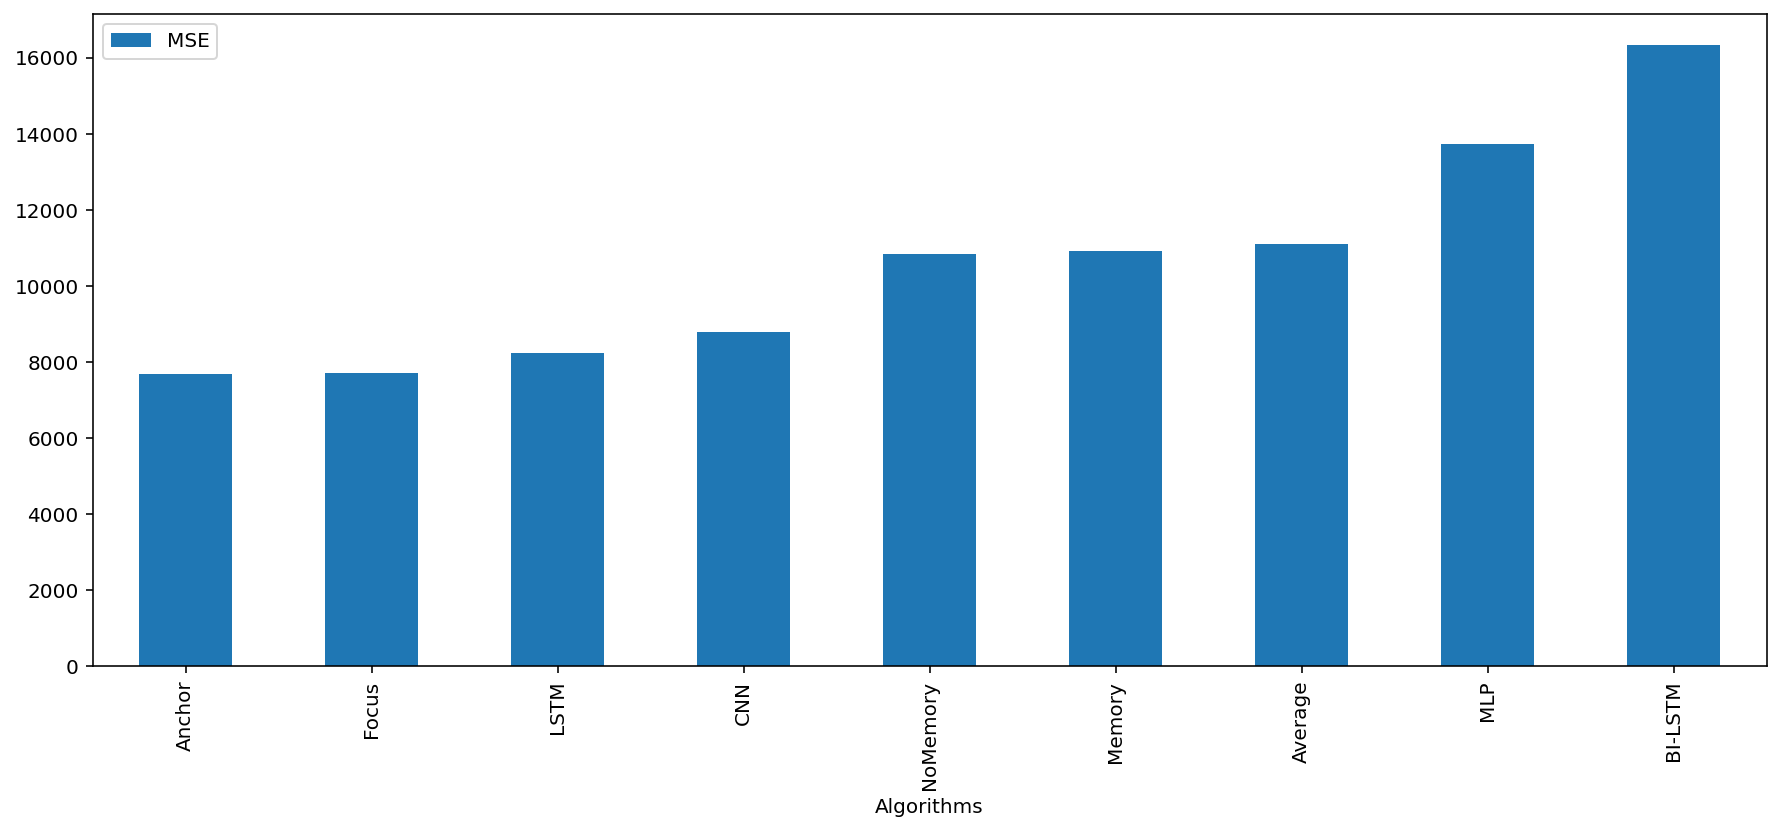

In [210]:
mse = mse_score(all_forecasts, True)
mse

In [22]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Average,0.001345
1,NoMemory,0.001312
2,Memory,0.001324
3,Focus,0.001048
4,Anchor,0.000846
5,LSTM,0.001137
6,CNN,0.001208
7,MLP,0.001868


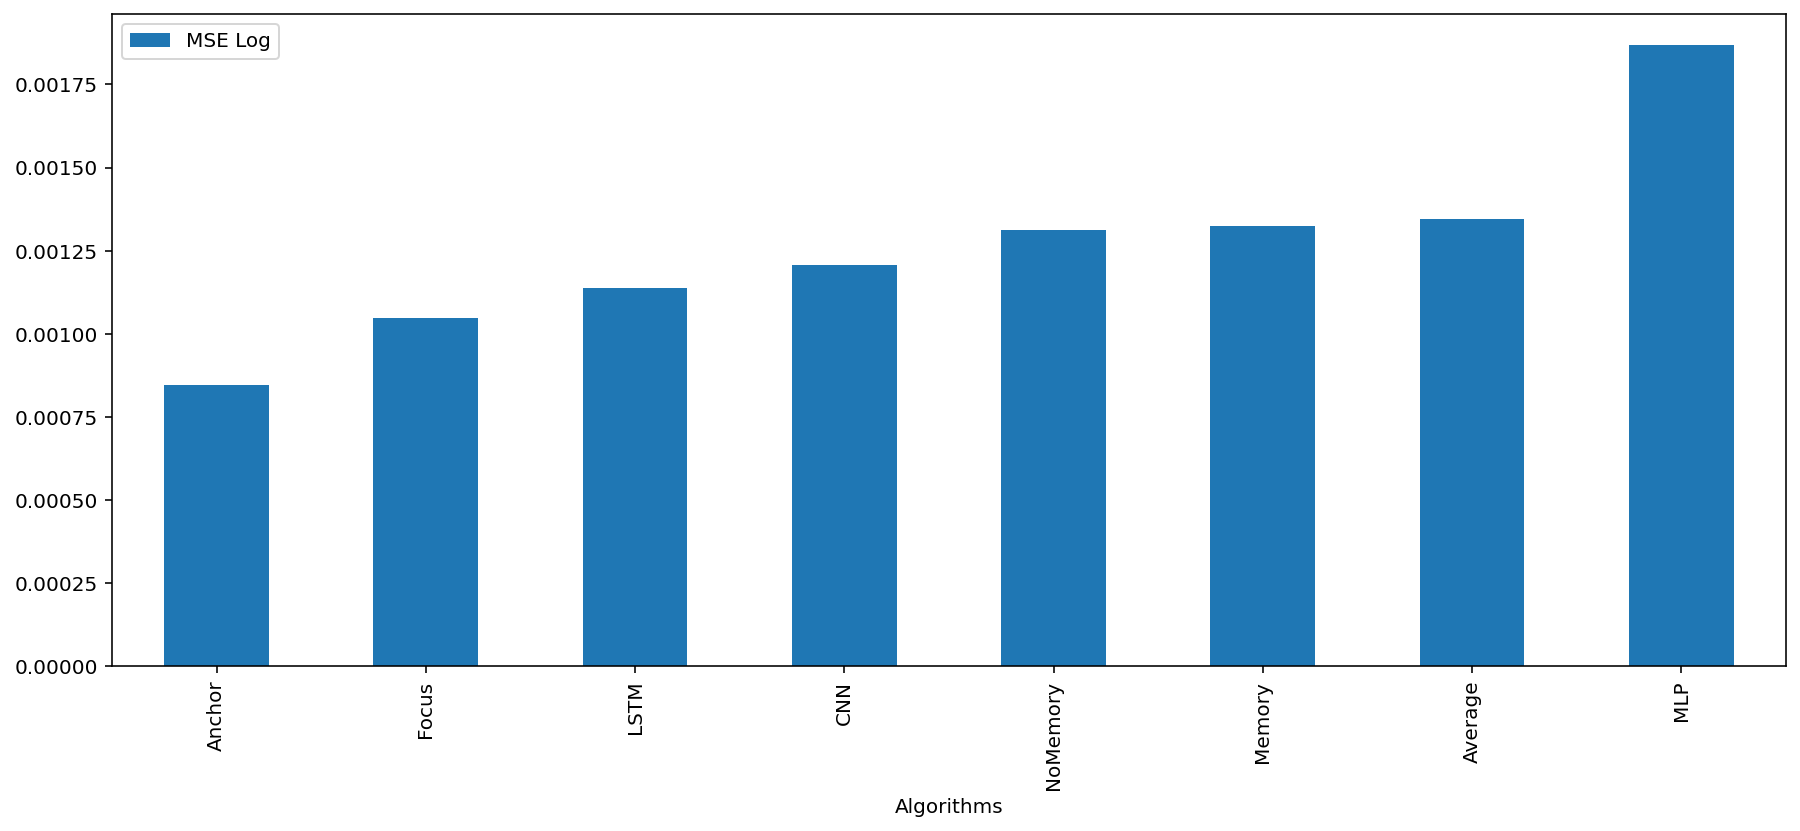

In [198]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [24]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,84.687612
1,NoMemory,82.546174
2,Memory,83.855335
3,Focus,75.426563
4,Anchor,66.072977
5,LSTM,78.147498
6,CNN,82.169562
7,MLP,103.751843


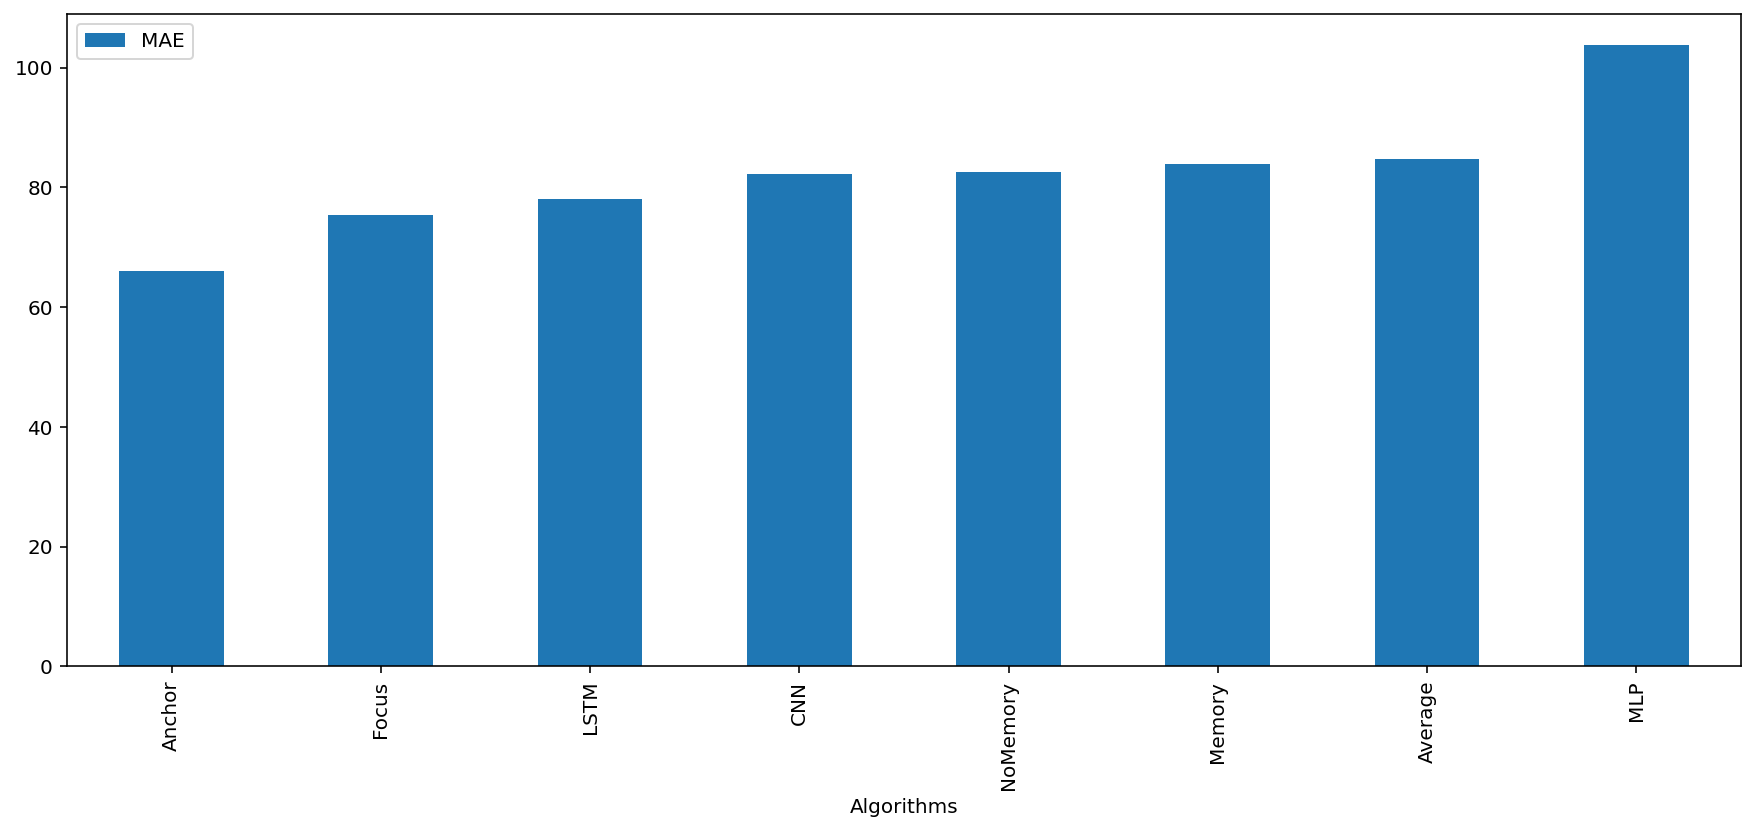

In [199]:
mae = mae_score(all_forecasts, True)
mae

In [26]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

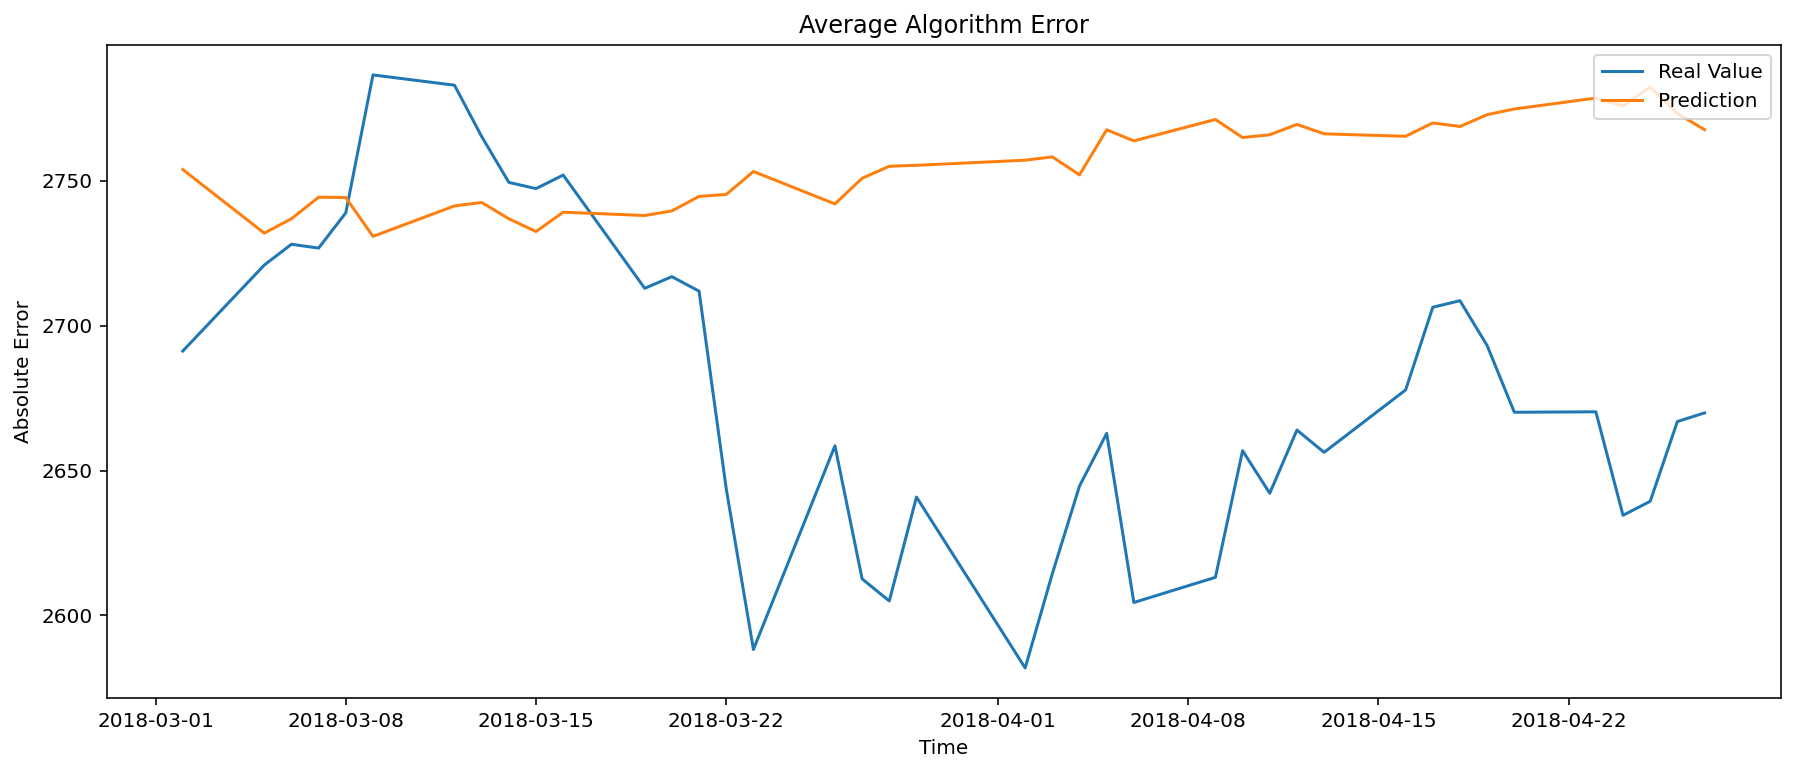

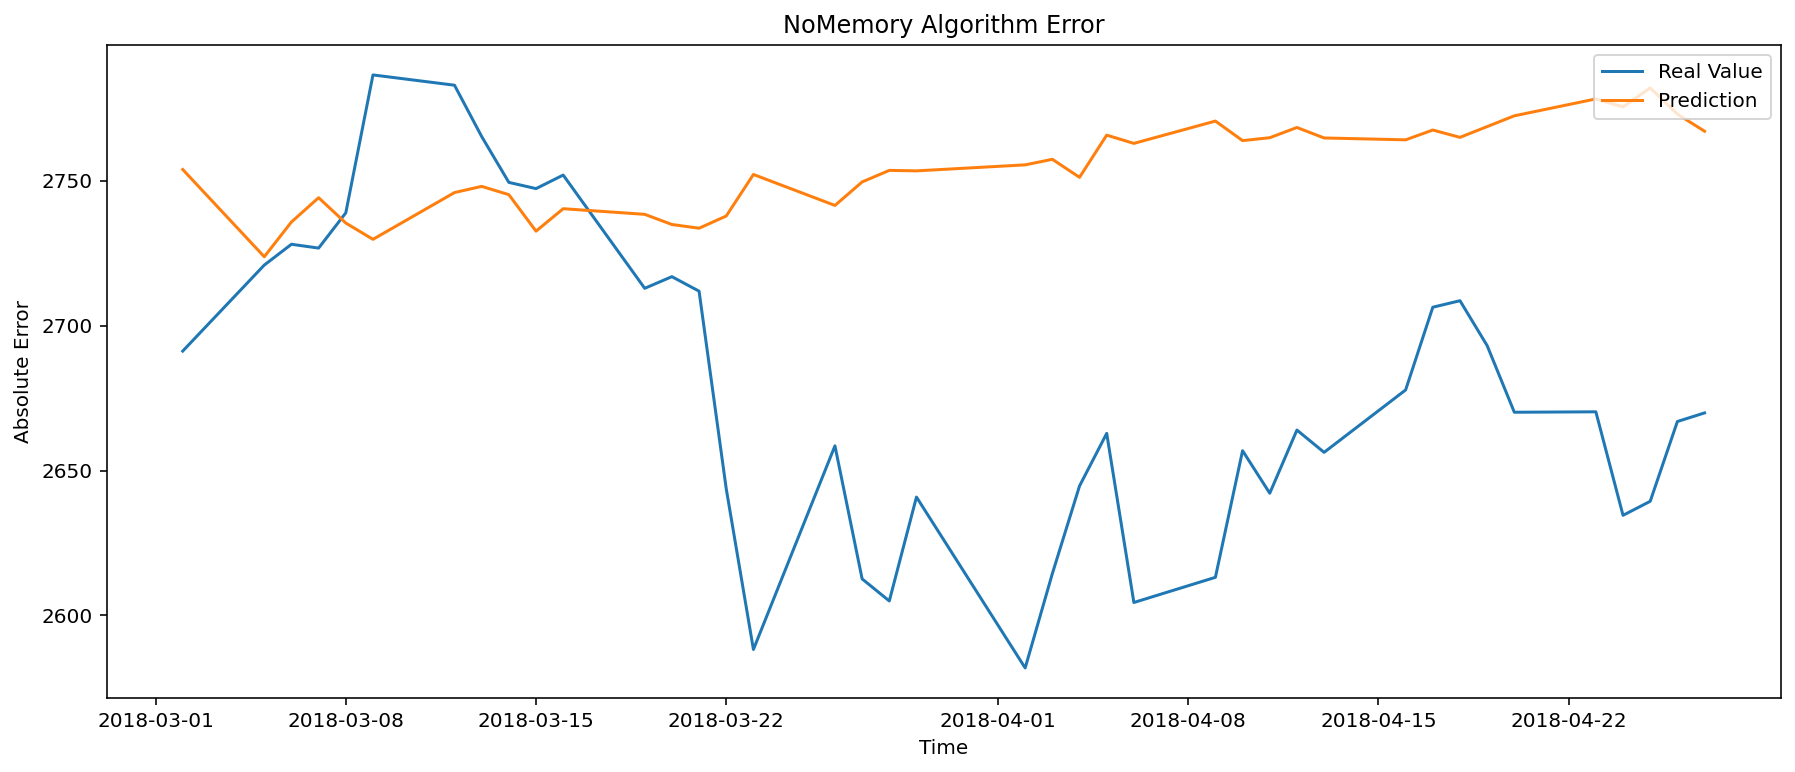

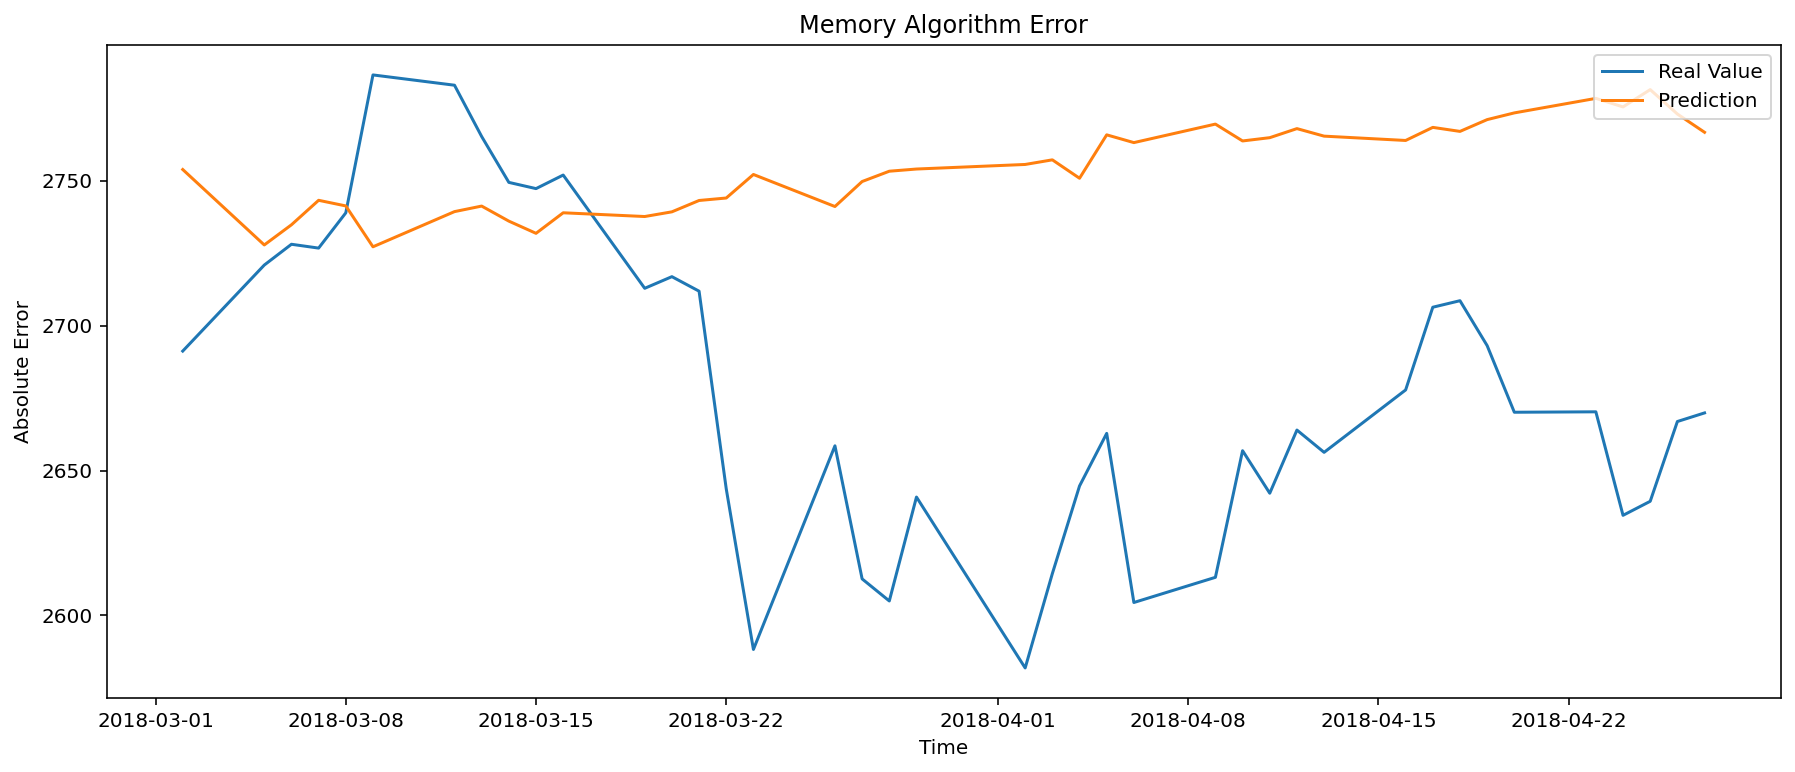

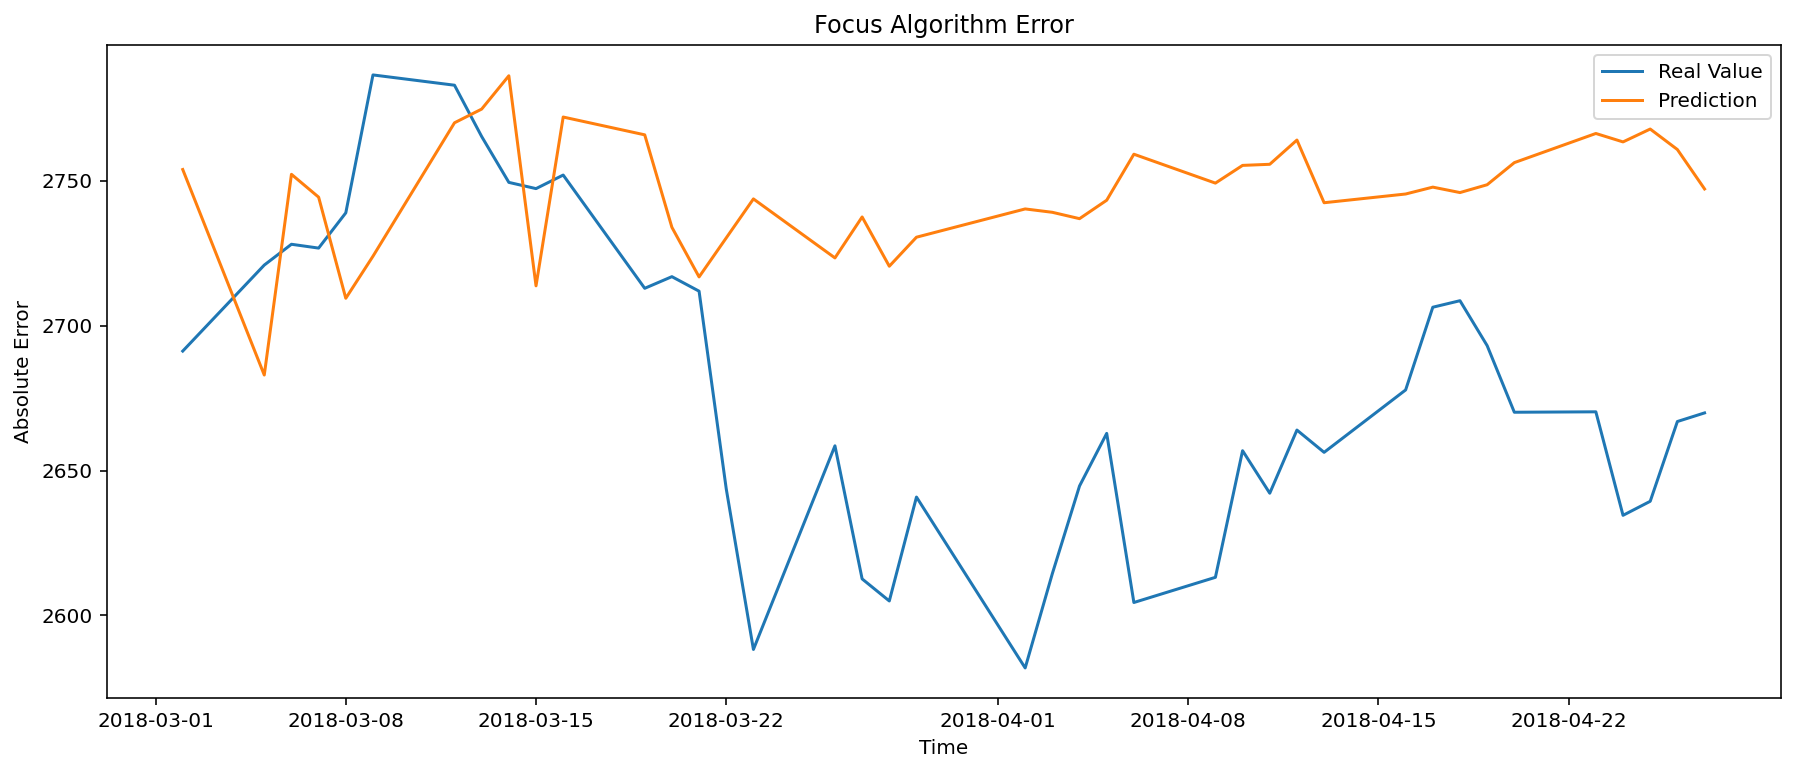

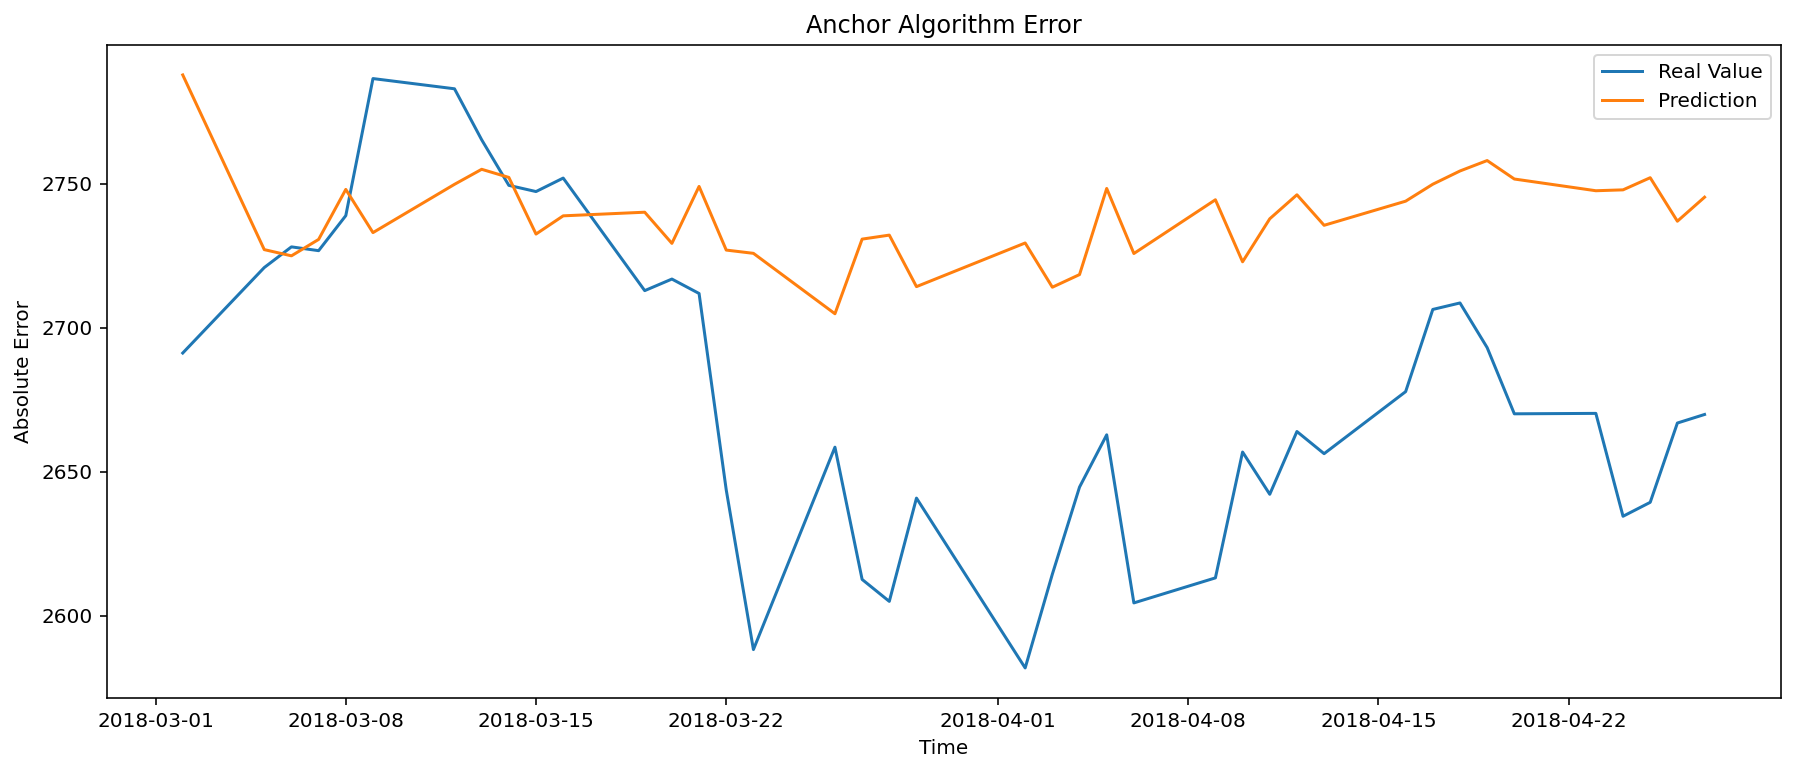

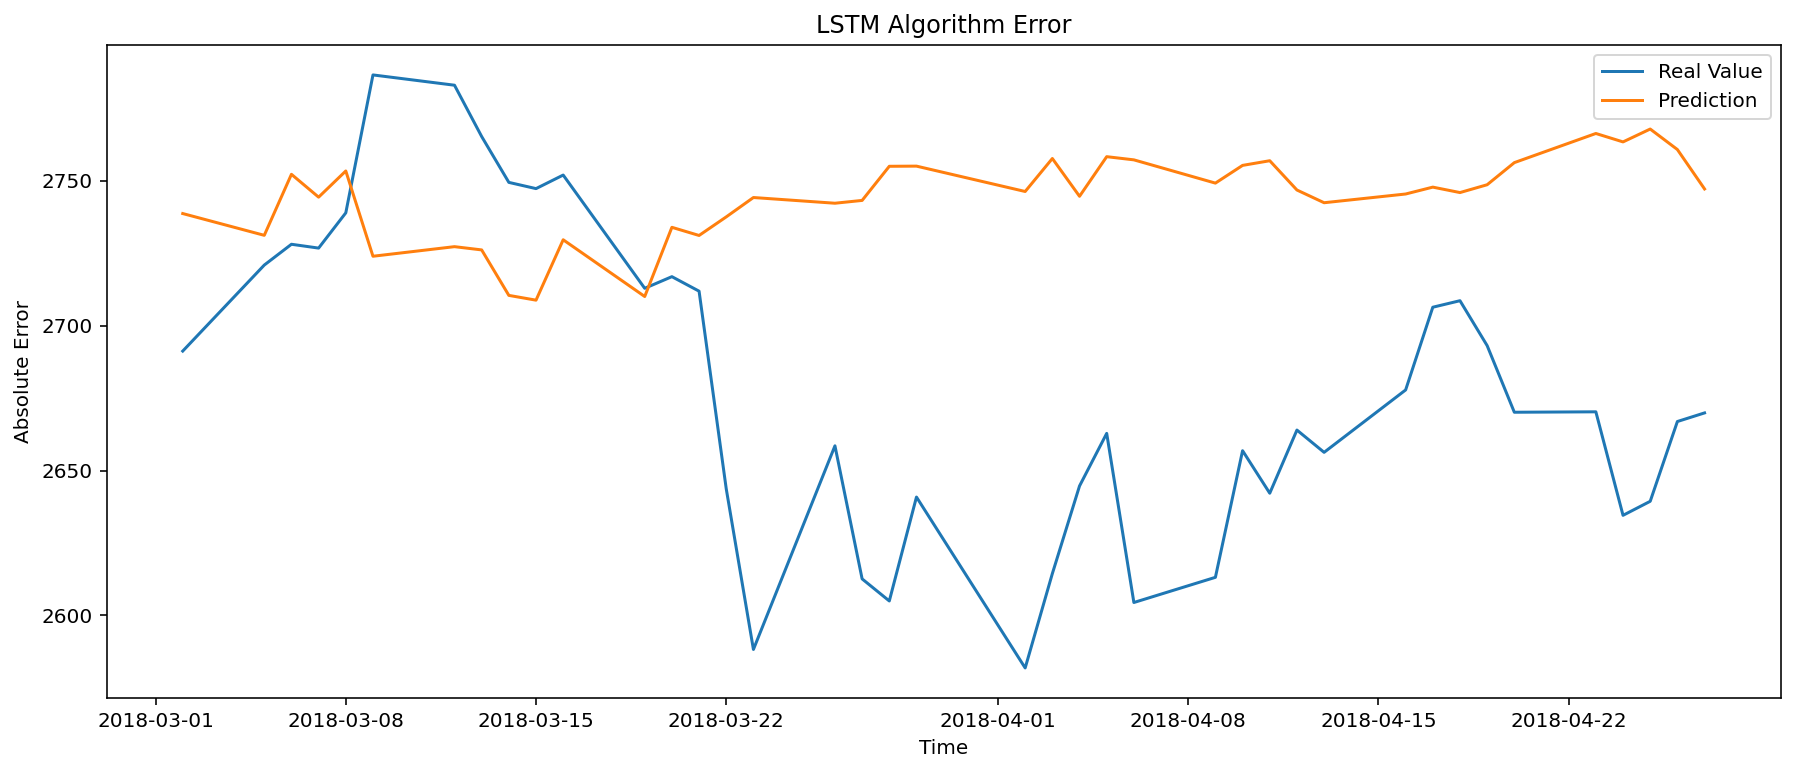

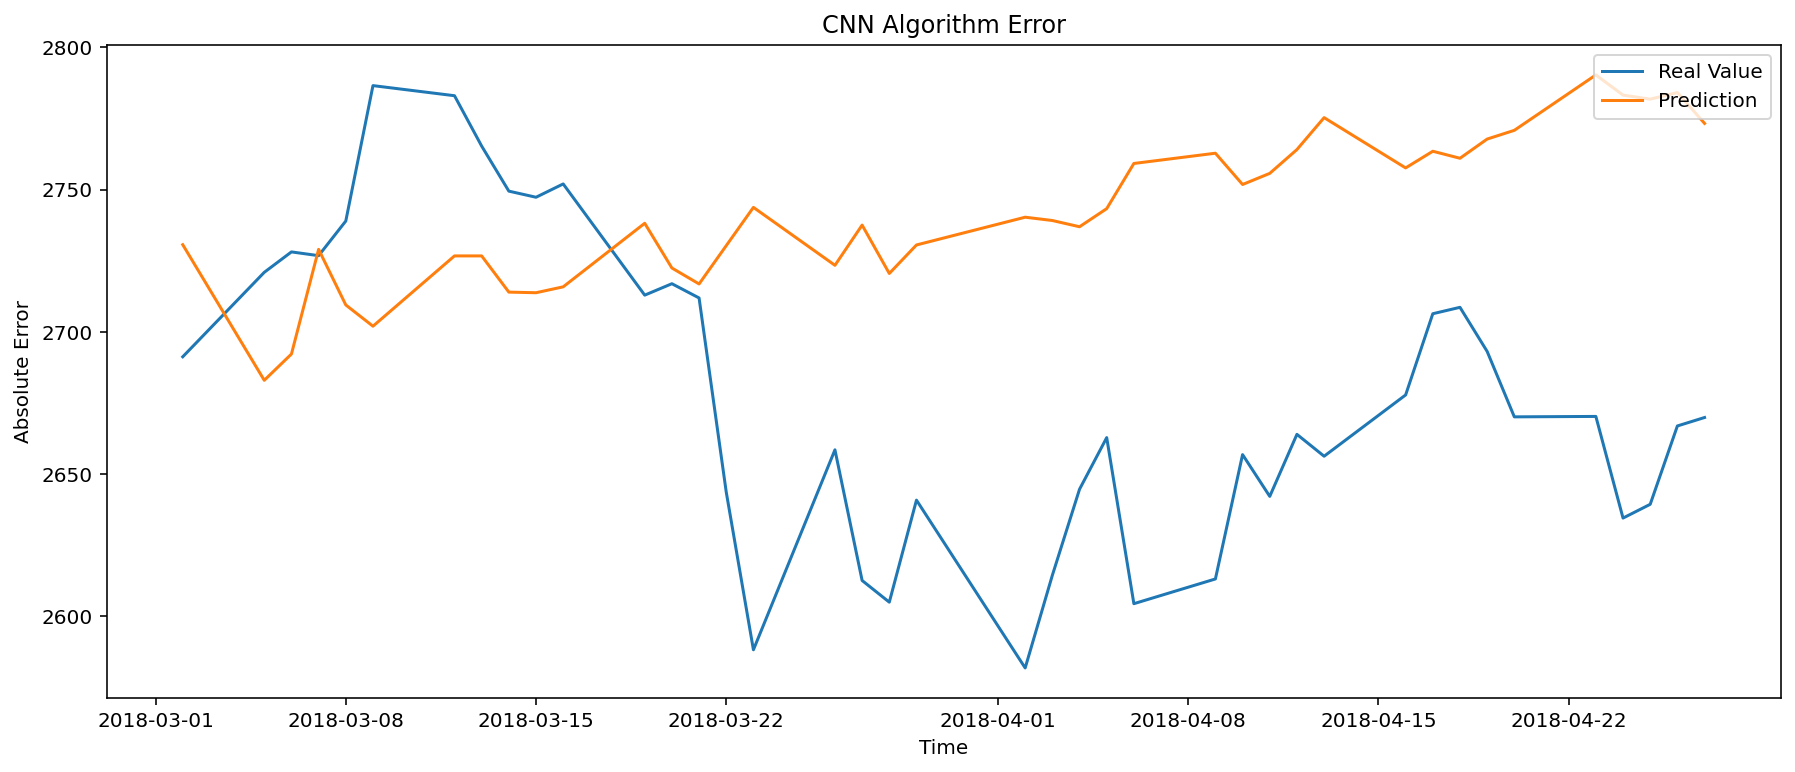

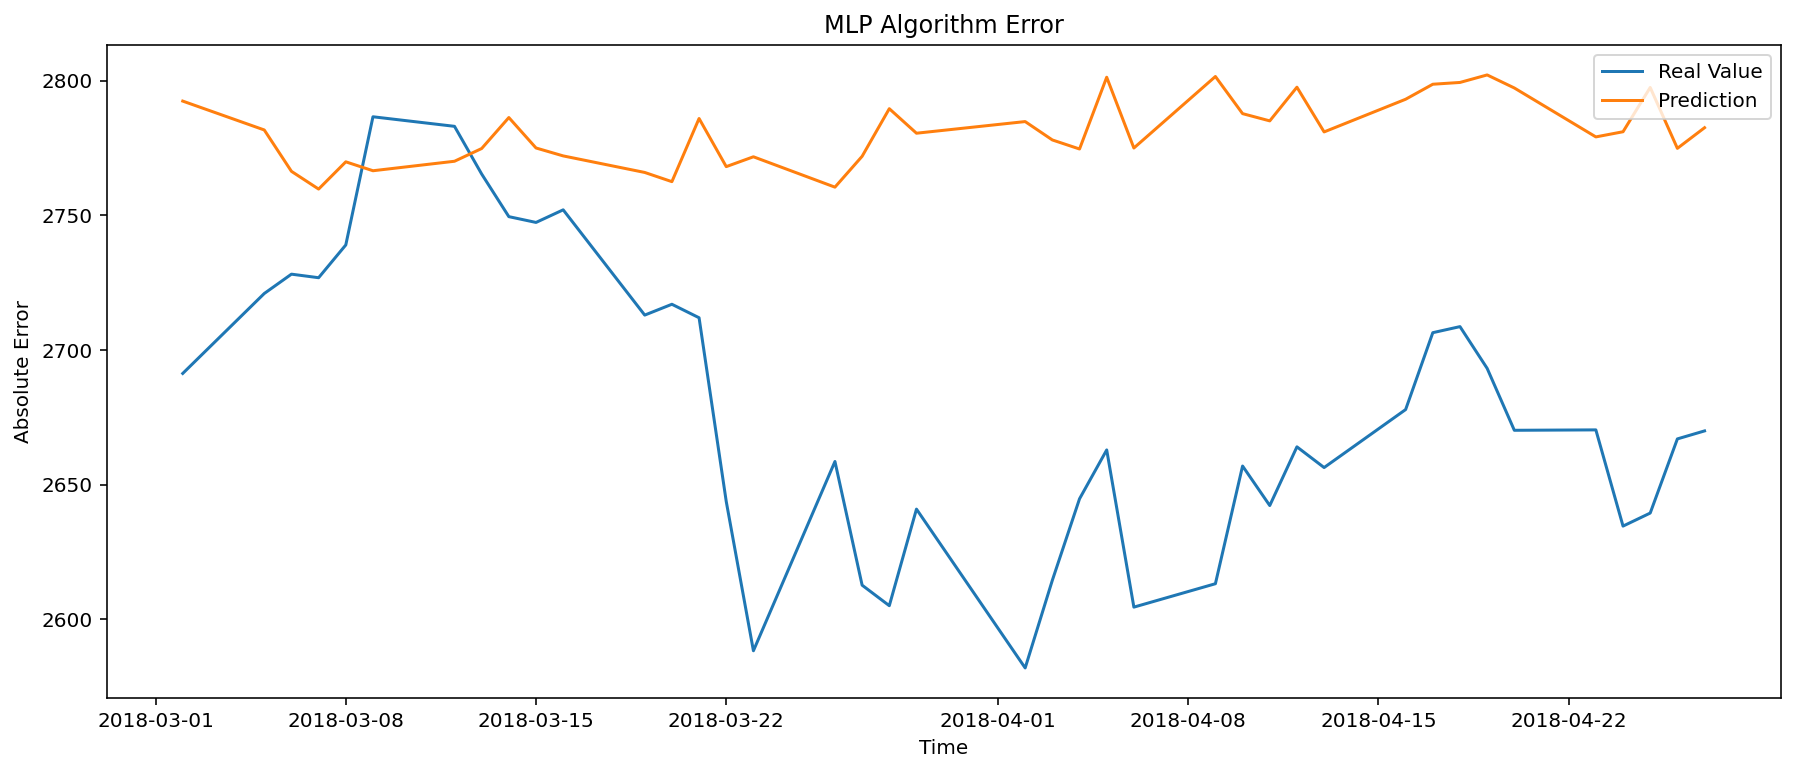

In [200]:
plot_performance(all_forecasts)